## フィルタリング処理
### 画像のフィルタリングによりエッジ検出などを実施する．
### 最初の部分はこれまでと同様

In [7]:
## メディア演習1 画像情報処理　0 まずは説明
## 画像のカメラからの取り込みとそのコピー
## まずはこれをよく理解すること

import numpy as np
import cv2
import matplotlib.pyplot as plt
import IPython
import time

In [ ]:
# カメラオープン
cap = cv2.VideoCapture(2)

# カメラを使えない場合はこちら
# 自動ループしないので，ビデオが終了したあとはこのセルを再実行すること
#cap = cv2.VideoCapture("input.mp4")

In [8]:
## 結果・入力画像をリアルタイムで表示するための関数
## 一部課題を除き基本的には書き換える必要はない

def update_disp(disp,image):
    _, enc = cv2.imencode(".jpg",image)
    disp.update(IPython.display.Image(data=enc.tobytes()))

## 何も表示しないためのプロセス
def zero(src, args=[]):
    return np.zeros(src.shape, dtype=np.uint8)

def image_show(process=zero, args=[]):
    ## 入力画像表示用ディスプレイ
    disp = IPython.display.display("Input",display_id=1)
    ## 結果画像表示用ディスプレイ
    disp2 = IPython.display.display("Result",display_id = 2)
    while cap.isOpened():
        try:
            ret, frame = cap.read()
            if ret is False:
                break
            # 入力画像と結果画像の表示を更新
            update_disp(disp,frame)
            update_disp(disp2, process(frame, args))
            time.sleep(1.0/30)

        except KeyboardInterrupt:
            break

## BGR を RGBに変換して表示
## 演習資料参照
def imshow(plt, img):
    plt.imshow(img[:,:,::-1])

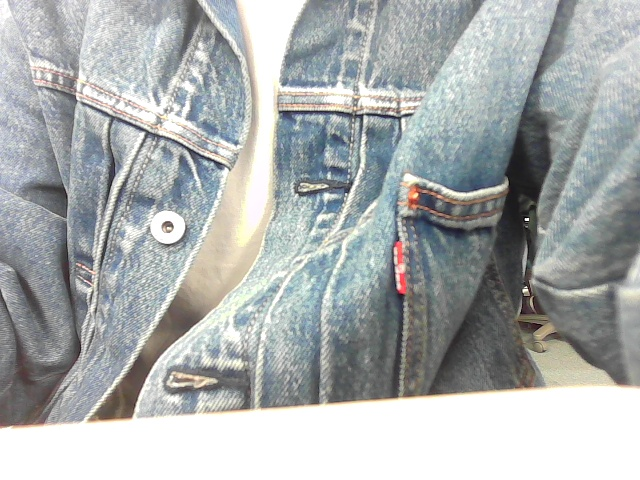

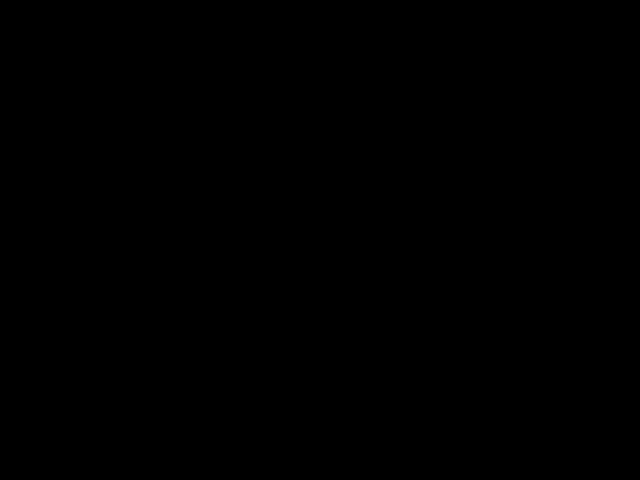

In [ ]:
## 画像表示のテスト
## 動画が表示されていればOK
## 適切に表示されない場合は，カメラの接続を確認すること．
## うまく表示されない場合の対処方法は，資料参照

image_show()

## 結果画像を表示させる場合は以下のように使う
## image_show(process, args)
## このとき，process は以下の形式を取る
## process(img, args) で結果画像を return
## 必ず2つの引数を持たなければならない，引数が不要の場合は以下のように初期値を与える（与えられない時，自動的にそれになる）
## process(img , args = [])
## 2つ以上の場合は，配列などで与える
## process(img, [theta, s, t]
## など．
## 以下の例で試してみること

width = 640
height = 480
channels = 3


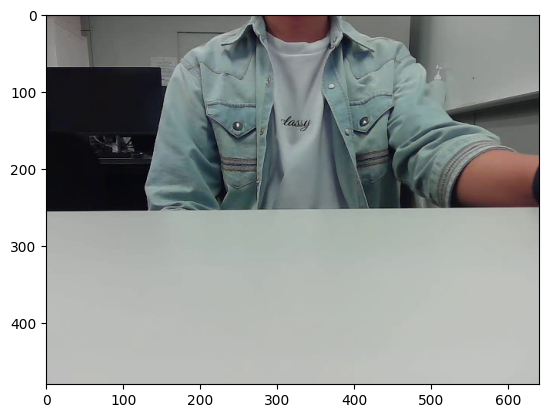

In [9]:
## 画像を１枚取り込んで表示する．
## ここまでは共通

## 画像は numpy 形式で保持される．
# ret, src = cap.read()
src = cv2.imread("before_conversion_7_body.jpg")
ret = src is not None
## 画像の読み込みが成功した場合は ret に True が代入される．
if (ret == True):
    imshow(plt,src)
    ## 画像サイズ等の情報は，src.shape に記録されている
    ## numpy は行列（等）を保持する形式のため，[行（高さ），列（幅），チャネル数] の順番で保存される
    ## また，チャネル数とは画像がカラー画像の場合は3，グレースケール画像の場合は1となる．
    ## 詳しくは講義資料等を確認すること
    print("width = %d" % src.shape[1])
    print("height = %d" % src.shape[0])
    print("channels = %d" % src.shape[2])
else:
    print("Image cannot be captured. Check camera connection")


## ここからが課題

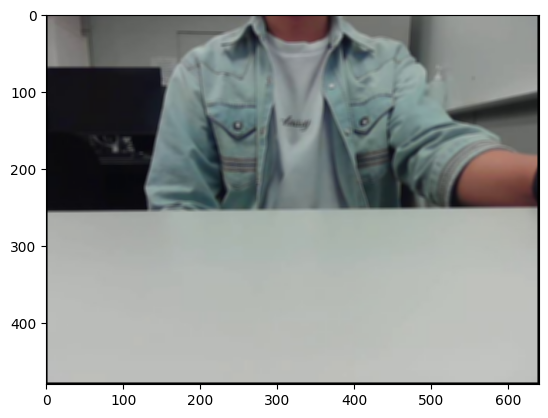

In [10]:
## 課題 4-1 平滑化フィルタ1
## 演習資料の内容を確認し．平滑化処理（単純平均）を実装せよ
## さらに，平滑化領域を広げた場合（3x3 を 5x5, 7x7 などに広げた場合），どのような効果があるかを確認せよ
## また，余裕があればpython プログラミングの工夫により，処理の高速化を実施せよ

def smoothing_average(src, args = []):
    dst = np.zeros(src.shape, dtype = np.uint8)
    ## ここに平滑化を記述せよ

    # 3×3
    """
    karnel = np.ones((3,3)) / 9.0
    for x in range(1, src.shape[1] -1):
      for y in range(1, src.shape[0] -1):
        for c in range(src.shape[2]):

          region = src[y - 1: y + 2, x - 1: x + 2, c]
          dst[y, x, c] = np.sum(region * karnel)
    """
    # 5×5
    karnel = np.ones((5,5)) / 25.0
    for x in range(2, src.shape[1] -2):
      for y in range(2, src.shape[0] -2):
        for c in range(src.shape[2]):
            region = src[y - 2: y + 3, x - 2: x + 3, c]

            dst[y, x, c] = np.sum(region * karnel)

    return dst

dst = smoothing_average(src)
imshow(plt, dst)



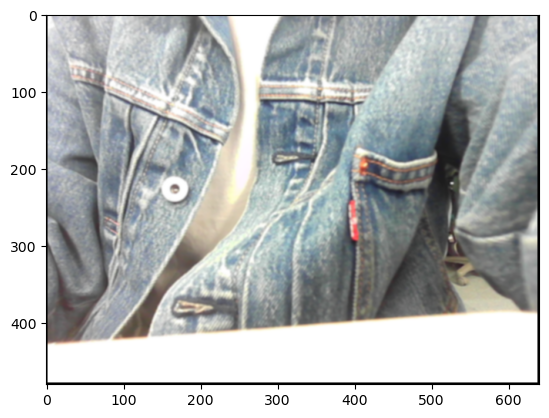

In [ ]:
## 課題4-2 平滑化フィルタ2
## 演習資料の内容を確認し．平滑化処理（ガウシアン）を実装せよ
## 先と同様に，フィルタリング範囲を広げた場合，どのような効果があるかを確認せよ．
## また，余裕があればpython プログラミングの工夫により，処理の高速化を実施せよ

def smoothing_gaussian(src, args = []):
    dst = np.zeros(src.shape, dtype = np.uint8)
    ## ここに平滑化を記述せよ
    # 3×3
    """
    gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0

    for x in range(1, src.shape[1] -1):
      for y in range(1, src.shape[0] -1):
        for c in range(src.shape[2]):
          region = src[y - 1: y + 2, x - 1: x + 2, c]
          dst[y, x, c] = np.sum(region * gaussian)

    """

    # 5×5
    gaussian = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]) / 256.0
    for x in range(2, src.shape[1] -2):
      for y in range(2, src.shape[0] -2):
        for c in range(src.shape[2]):
            region = src[y - 2: y + 3, x - 2: x + 3, c]
            if(np.sum(region * gaussian) >= 255):
                dst[y, x, c] = 255
            else:
                dst[y, x, c] = np.sum(region * gaussian)
    return dst

dst = smoothing_gaussian(src)
imshow(plt, dst)



True

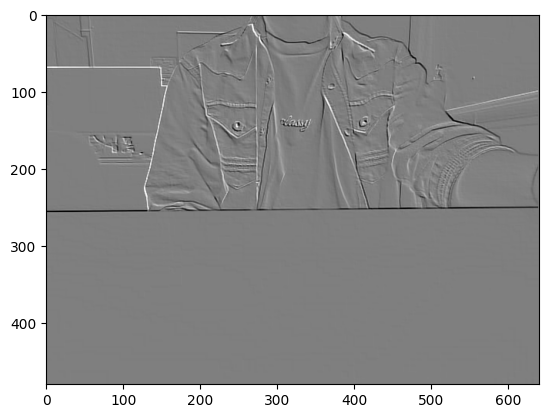

In [51]:
## 課題5-1 Sobel フィルタ
## 演習資料の内容を確認し．Sobelフィルタを実装せよ
## 水平方向，垂直方向のそれぞれを作成した後，エッジ強度を求めるフィルタを作成せよ

def edge_sobel_hori(src,args=[-500, 500]):
    min, max = args[0], args[1]
    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ
    # グレースケール画像に変換
    gray = np.zeros((src.shape[0], src.shape[1]), dtype=np.float64)

    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            gray[y, x] = 0.299 * src[y, x, 2] + 0.587 * src[y, x, 1] + 0.114 * src[y, x, 0]

    # Sobelフィルタ（水平方向）
    sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float64)
    grad_x = np.zeros_like(gray, dtype=np.float64)

    # 水平方向勾配計算
    for y in range(1, gray.shape[0] - 1):
        for x in range(1, gray.shape[1] - 1):
            region = gray[y - 1:y + 2, x - 1:x + 2]
            gx = np.sum(region * sobel_h)
            grad_x[y, x] = gx


    gm = 255.0 / (max - min)

    for x in range(grad_x.shape[1]):
        for y in range(grad_x.shape[0]):
            z = grad_x[y, x]
            if z < min:
                dst[y, x] = 0
            elif z > max:
                dst[y, x] = 255
            else:
                dst[y, x] = np.uint8((z - min) * gm)


    return dst



def edge_sobel_vert(src, args=[]):
    min, max = args[0], args[1]
    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ
    # グレースケール画像に変換
    gray = np.zeros((src.shape[0], src.shape[1]), dtype=np.float64)

    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            gray[y, x] = 0.299 * src[y, x, 2] + 0.587 * src[y, x, 1] + 0.114 * src[y, x, 0]

    # Sobelフィルタ（垂直方向）
    sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float64)
    grad_y = np.zeros_like(gray, dtype=np.float64)

    # 垂直方向勾配計算
    for y in range(1, gray.shape[0] - 1):
        for x in range(1, gray.shape[1] - 1):
            region = gray[y - 1:y + 2, x - 1:x + 2]
            gx = np.sum(region * sobel_v)
            grad_y[y, x] = gx


    gm = 255.0 / (max - min)

    for x in range(grad_y.shape[1]):
        for y in range(grad_y.shape[0]):
            z = grad_y[y, x]
            if z < min:
                dst[y, x] = 0
            elif z > max:
                dst[y, x] = 255
            else:
                dst[y, x] = np.uint8((z - min) * gm)

    return dst

def edge_sobel_pow(src, args=[-255,255]):
    min, max = args[0], args[1]
    dst = np.zeros(src.shape, dtype = np.uint8)
    # グレースケール画像に変換
    gray = np.zeros((src.shape[0], src.shape[1]), dtype=np.float64)

    for x in range(src.shape[1]):
        for y in range(src.shape[0]):
            gray[y, x] = 0.299 * src[y, x, 2] + 0.587 * src[y, x, 1] + 0.114 * src[y, x, 0]

    # Sobelフィルタ（水平・垂直）
    sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float64)
    sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float64)

    grad_x = np.zeros_like(gray, dtype=np.float64)
    grad_y = np.zeros_like(gray, dtype=np.float64)

    # Sobelフィルタ適用
    for y in range(1, gray.shape[0] - 1):
        for x in range(1, gray.shape[1] - 1):
            region = gray[y - 1:y + 2, x - 1:x + 2]
            gx = np.sum(region * sobel_h)
            gy = np.sum(region * sobel_v)
            grad_x[y, x] = gx
            grad_y[y, x] = gy

    grad_magnitude = np.sqrt(grad_x ** 2 + grad_y ** 2)

    gm = 255.0 / (max - min)

    for x in range(grad_magnitude.shape[1]):
        for y in range(grad_magnitude.shape[0]):
            z = grad_magnitude[y, x]
            if z < min:
                dst[y, x] = 0
            elif z > max:
                dst[y, x] = 255
            else:
                dst[y, x] = np.uint8((z - min) * gm)


    return dst

## 適当に変更しながら確認すること．
dst = edge_sobel_hori(src)
plt.imshow(dst)
cv2.imwrite('naname.jpg', dst)



In [ ]:
## フィルタリング本体
## 一般化したフィルタリング処理．フィルタを配列として与えて畳み込み

def image_filtering(src, args = []):
    kernel = args[0]
    dst = np.zeros(src.shape, dtype = np.uint8)


    return dst


## 適当に変更しながら確認すること．

# フィルタを適当に設定
kernel = np.array([1])
dst = image_filtering(src,kernel)
plt.imshow(dst)



In [ ]:
## 発展課題（取り組むことを推奨）
## FFT（高速フーリエ変換）を用いた高速畳み込み演算

def image_filtering_FFT(src, kernel=[]):
    dst = np.zeros(src.shape, dtype = np.uint8)
    ## 離散高速フーリエ変換，逆フーリエ変換の関数は以下の通り．

    ## フーリエ変換により画像を周波数成分に変換
    f_src = np.fft.fft2(src)
    ## 逆フーリエ変換により周波数成分を画像に変換，実部のみを取り出す．
    ## dst には，単なるコピーが入る
    dst = np.fft.ifft2(f_src)

    ## 上を参考に，実際のフィルタリング処理を実装せよ．
    ## また，処理速度の差について，フィルタサイズなどを変えながら通常の実装と比較せよ．

    return dst

# フィルタを適当に設定
kernel = np.array([1])
dst = image_filtering(src,kernel)
plt.imshow(dst)



In [ ]:
## 課題 0-3
## 作成した関数を用いてリアルタイムでの動作を確認せよ
## image_show に与える関数を変化させて，動作を確認せよ．
## 下の例はコピーをそのまま表示

image_show(smooth_average)